### 统计结果分布图

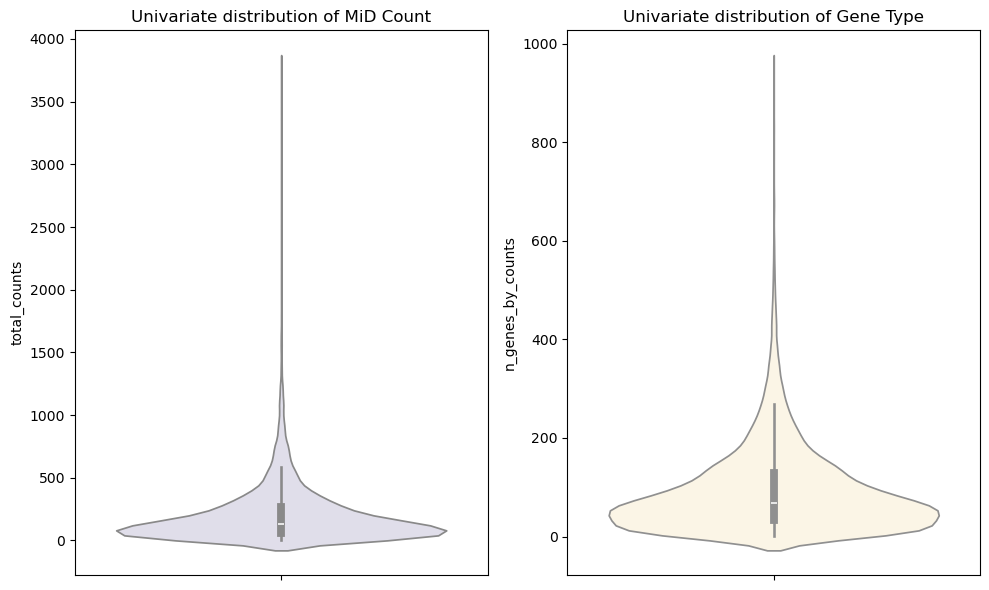

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Data/AureliaMargin.bin50.normalized.h5ad")

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Max:3791, Q1:61, Q2:135, Q3:270, Min:1
sns.violinplot(
    data=st_AureliaMargin.obs,
    y="total_counts",
    inner="box",
    ax=axes[0],
    color="#DEDCEC"
)
axes[0].set_title("Univariate distribution of MiD Count")

# Max:948, Q1:33, Q2:68, Q3:128, Min:1
sns.violinplot(
    data=st_AureliaMargin.obs,
    y="n_genes_by_counts",
    inner="box",
    ax=axes[1],
    color="#FFF7E2"
)
axes[1].set_title("Univariate distribution of Gene Type")

plt.tight_layout()
plt.show()

### Spots 空间分布

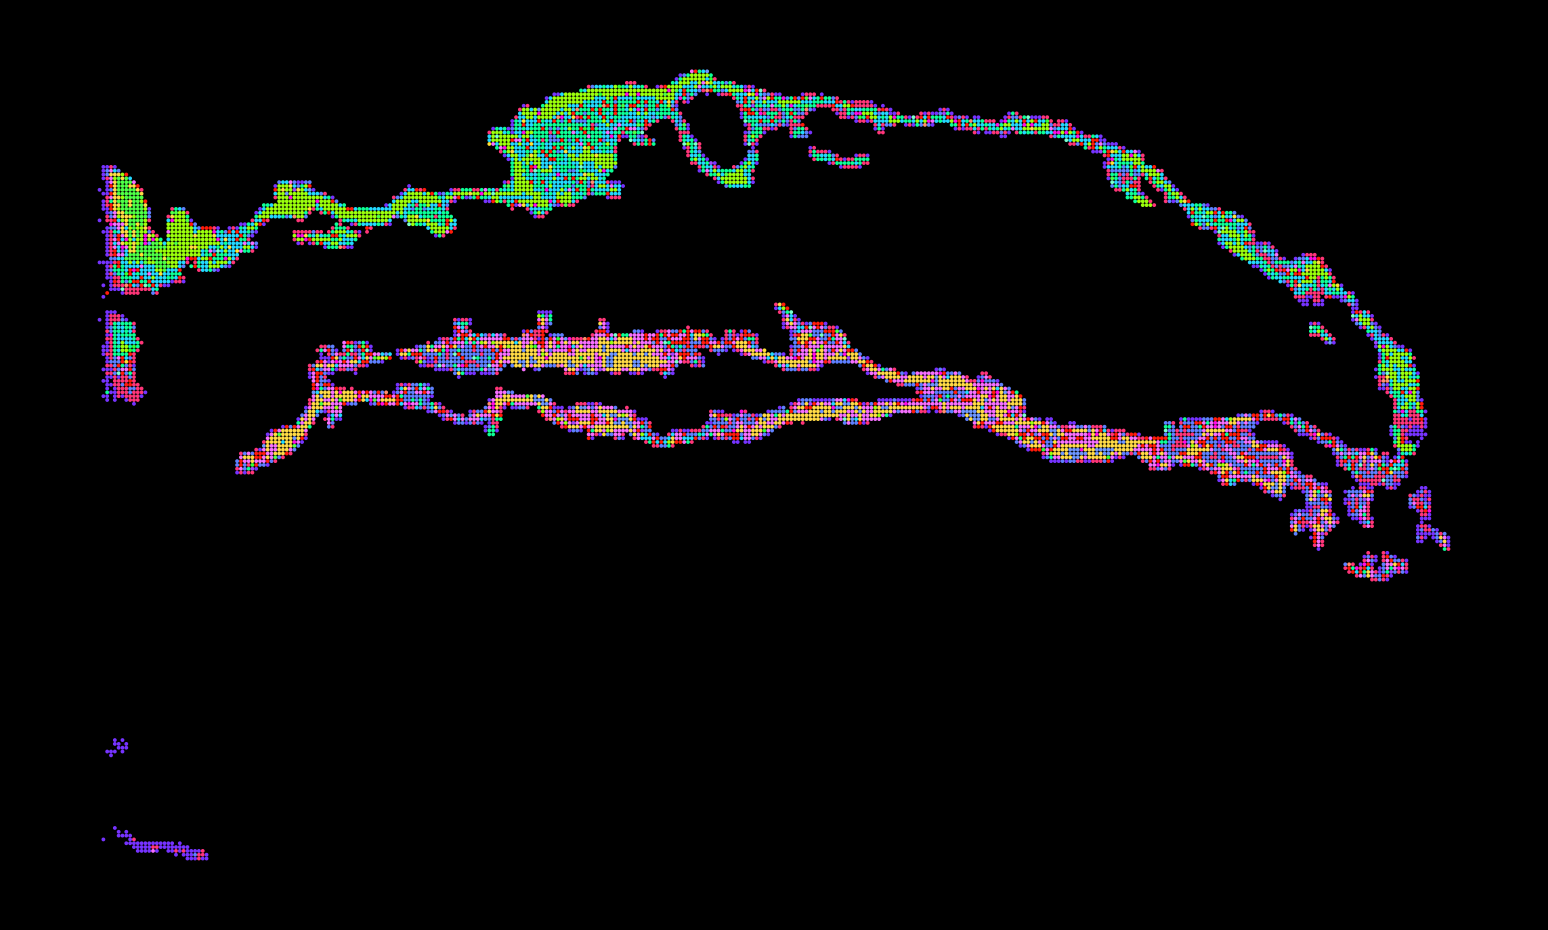

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Data/AureliaMargin.bin50.normalized.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.spatial(
    st_AureliaMargin,
    color="leiden",
    spot_size=50,
    img=None,           # ⭐ 不显示组织图，只显示点
    legend_loc=None,    # ⭐ 不显示图例（可选）
    frameon=False,      # ⭐ 去掉边框
    ax=ax,
    show=False
)

# 黑色背景
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# 去掉坐标轴标签
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

plt.show()


### UMAP leiden

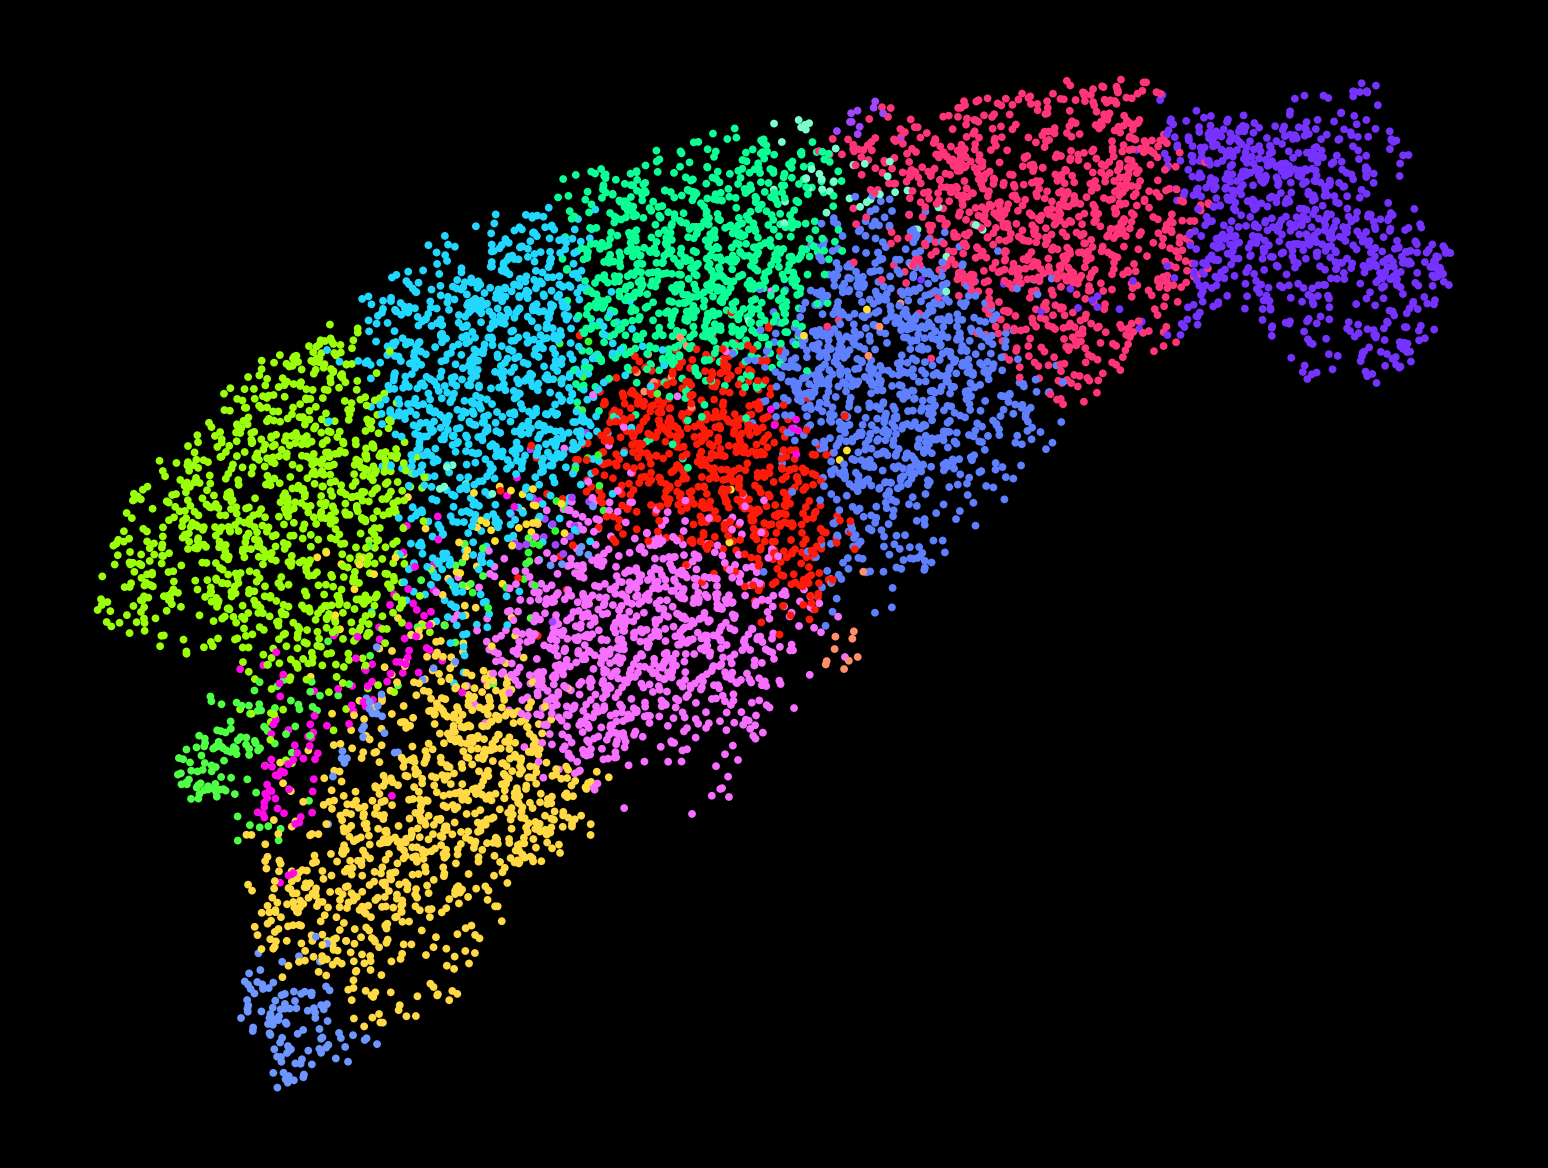

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Data/AureliaMargin.bin50.normalized.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.umap(
    st_AureliaMargin,
    color='leiden',
    title='Ac9-3 UMAP projection of spots (bin50, leiden)',
    ax=ax,
    show=False,
    legend_loc=None,   # ⭐ 不显示图例
    frameon=False      # ⭐ 去掉坐标轴边框
)

# 黑色背景
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# ⭐ 去掉坐标刻度与标签、标题
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

plt.show()


### 聚类数量统计

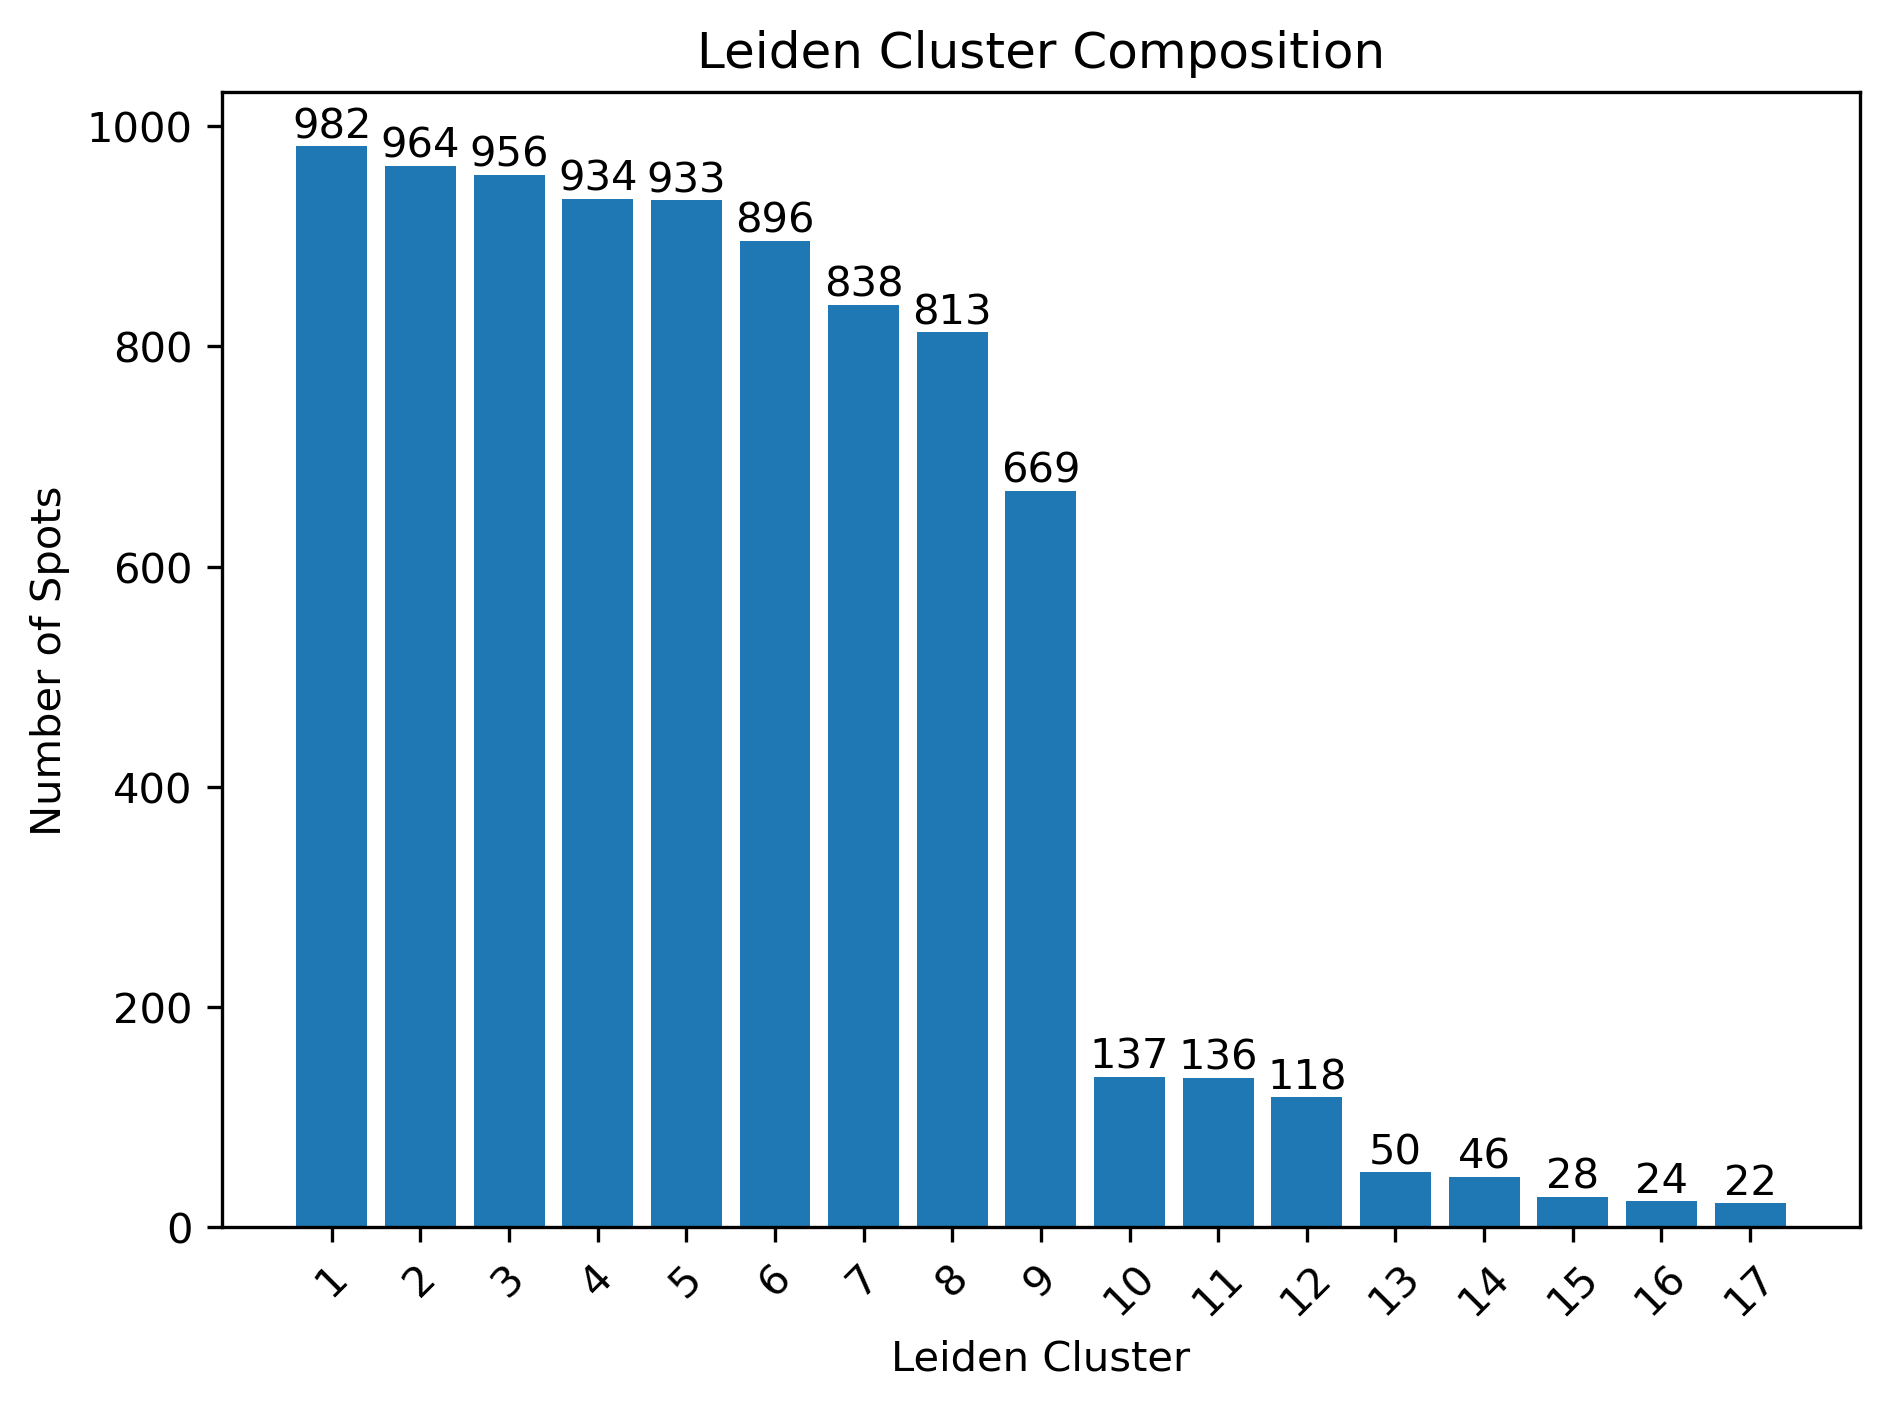

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

st_AureliaMargin = sc.read_h5ad("./Data/AureliaMargin.bin50.normalized.h5ad")

# Count Leiden clusters
counts = st_AureliaMargin.obs['leiden'].value_counts().sort_index()

# Build DataFrame (optional, for clearer plotting)
df = pd.DataFrame({
    "Cluster": counts.index.astype(str),
    "Count": counts.values
})

# Plot
fig, ax = plt.subplots(dpi=300)
bars = ax.bar(df["Cluster"], df["Count"])   # ← default colors

# Add numbers on top of bars
ax.bar_label(bars, fmt='%d')

# Labels
ax.set_title("Leiden Cluster Composition")
ax.set_xlabel("Leiden Cluster")
ax.set_ylabel("Number of Spots")

# Rotate x tick labels (more readable)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


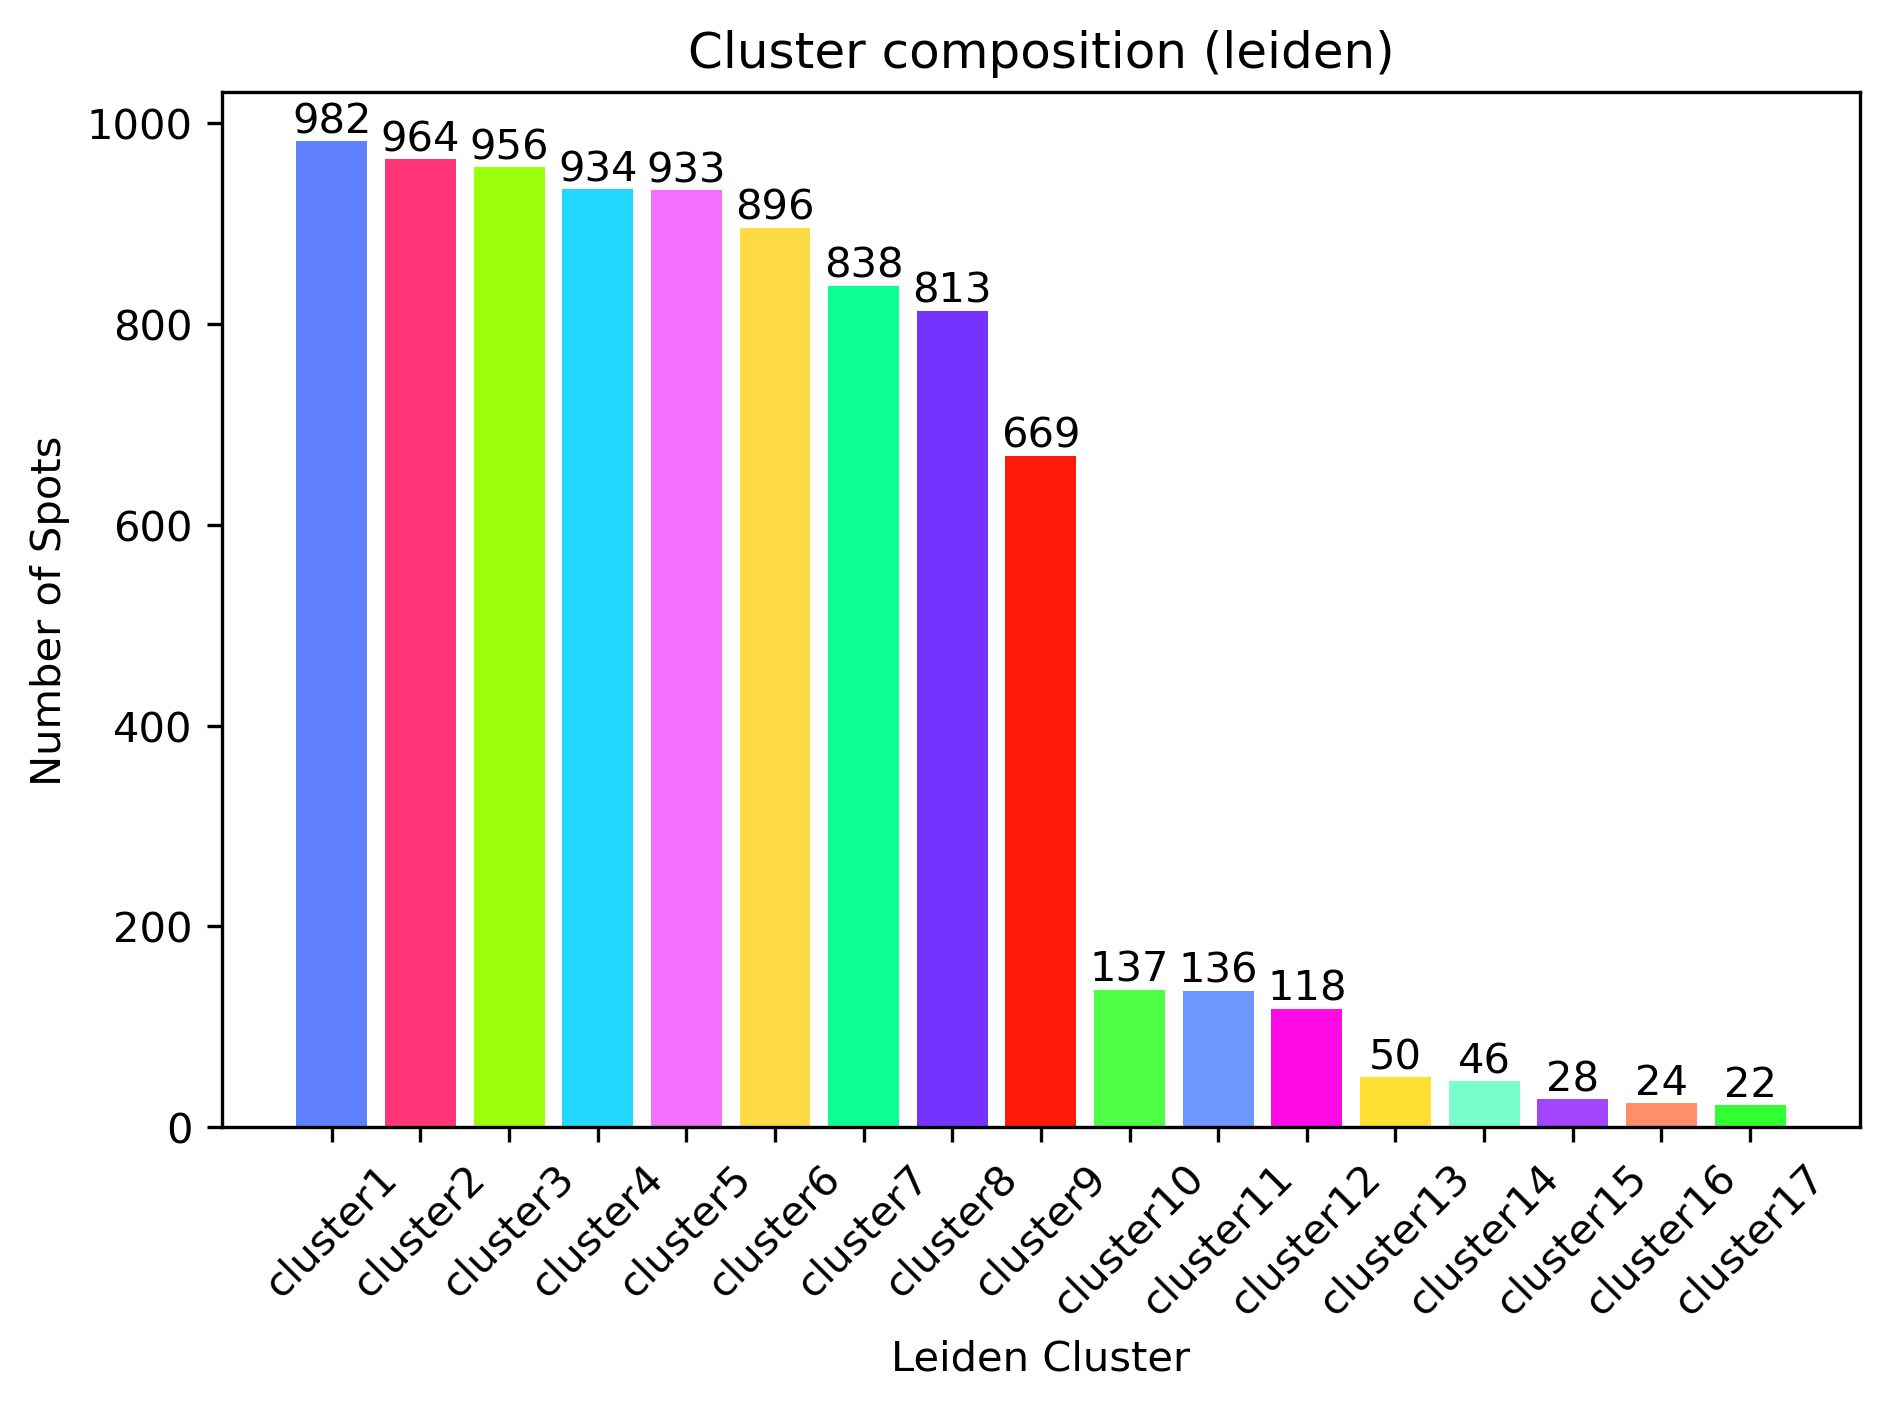

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

st_AureliaMargin = sc.read_h5ad("./Data/AureliaMargin.bin50.normalized.h5ad")

# 1. 统计 Leiden cluster 数量
counts = st_AureliaMargin.obs['leiden'].value_counts().sort_index()

# 2. 提取 Scanpy 生成的 leiden 颜色（按分类顺序）
leiden_categories = st_AureliaMargin.obs['leiden'].cat.categories
leiden_colors = st_AureliaMargin.uns['leiden_colors']

# 3. 将 Index 与颜色对应
color_map = dict(zip(leiden_categories, leiden_colors))

# 4. DataFrame
df = pd.DataFrame({
    "Cluster": ["cluster" + str(i) for i in counts.index],
    "Leiden": counts.index,
    "Count": counts.values
})

# 5. 绘图
fig, ax = plt.subplots(dpi=300)
bars = ax.bar(
    df["Cluster"],
    df["Count"],
    color=[color_map[str(i)] for i in df["Leiden"]]
)

# 6. 显示数值
ax.bar_label(bars, fmt='%d')

# 7. 轴、标题、倾斜 45 度
ax.set_title("Cluster composition (leiden)")
ax.set_xlabel("Leiden Cluster")
ax.set_ylabel("Number of Spots")

plt.xticks(rotation=45)   # ⭐ 关键：x轴标签倾斜45°

plt.tight_layout()
plt.show()


### 层次聚类

['14' '15' '16' '7' '9' '1' '2' '8' '13' '12' '10' '3' '4' '17' '5' '6'
 '11']
[1 1 2 2 3 3 1 1 1 2 3 2 2 1 1 1 3]


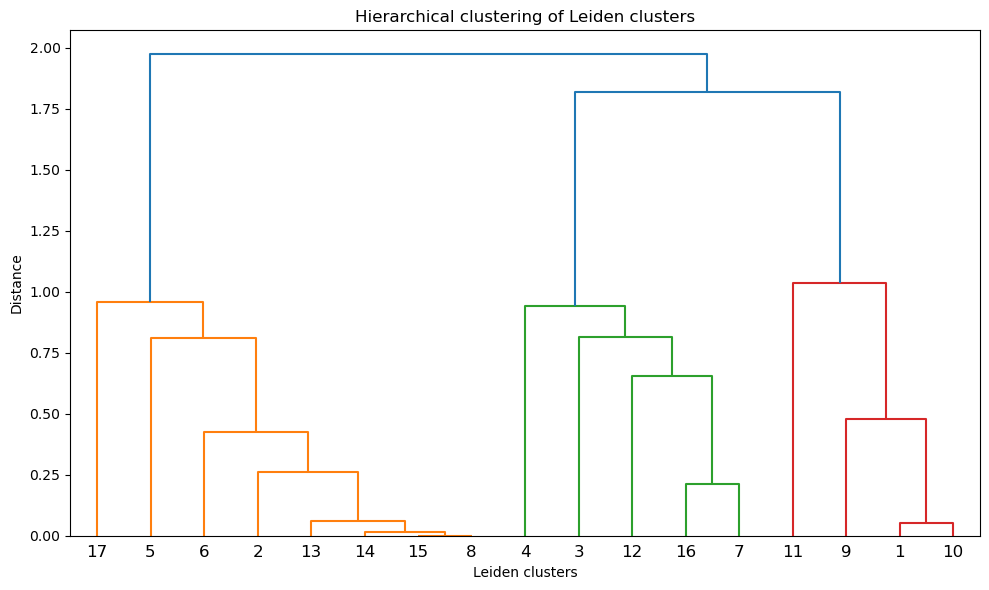

In [12]:
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

st_AureliaMargin = sc.read_h5ad("./Data/AureliaMargin.bin50.normalized.h5ad")

# leiden linkage
linkage = st_AureliaMargin.uns["dendrogram_leiden"]["linkage"]
leiden_order = st_AureliaMargin.uns["dendrogram_leiden"]["categories_ordered"]
print(leiden_order)

# Hierarchical cluster
super_cluster_labels = fcluster(linkage, 3, criterion="maxclust")
print(super_cluster_labels)

# 绘制 dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linkage,
    labels=leiden_order,
    orientation='top',       # 横向展示 cluster 层次关系
    # leaf_rotation=90,        # 标签旋转 90 度，便于阅读
    color_threshold=None     # 显示完整树，不自动着色
)
plt.title("Hierarchical clustering of Leiden clusters")
plt.xlabel("Leiden clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


### 初始化注释Spatial